Epoch [0/2000], Loss: 4006.450439
Epoch [200/2000], Loss: 3458.941406
Epoch [400/2000], Loss: 2547.790039
Epoch [600/2000], Loss: 1380.092041
Epoch [800/2000], Loss: 556.523560
Epoch [1000/2000], Loss: 340.877502
Epoch [1200/2000], Loss: 320.754395
Epoch [1400/2000], Loss: 303.496490
Epoch [1600/2000], Loss: 290.753967
Epoch [1800/2000], Loss: 284.068359
Test Loss: 1021.188477


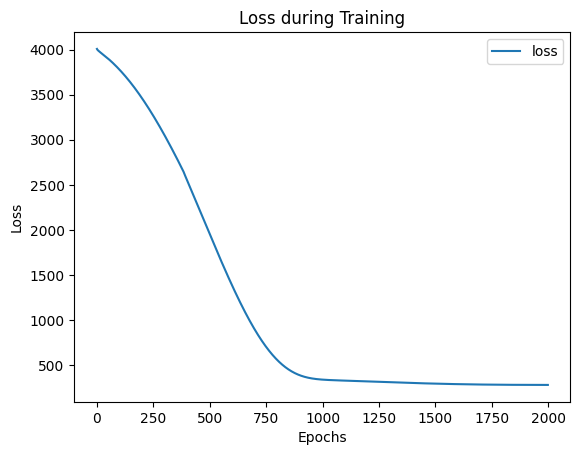

Prediction: 61.969722747802734


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
dataset = pd.read_excel('/content/dl 1.xlsx')

# The dataset columns have trailing spaces: 'Input ' and 'Output '
X = dataset[['Input ']].values
y = dataset[['Output ']].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=33
)

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

def train_model(model, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        model.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")

train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f"Test Loss: {test_loss.item():.6f}")

loss_df = pd.DataFrame(ai_brain.history)
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

X_new = torch.tensor([[9]], dtype=torch.float32)
X_new_scaled = scaler.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)
prediction = ai_brain(X_new_tensor).item()
print(f"Prediction: {prediction}")